# **🎬** **Netflix Movies and TV Shows**


## **▶️** **Step 1: Instruction and Importing the Dataset**

### **📂** **Mounting Google Drive**

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### **📚 Importing Necessary Libraries**

In [41]:
!pip install fuzzywuzzy
!pip install python-Levenshtein
from fuzzywuzzy import fuzz
from fuzzywuzzy import process


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 162.6/162.6 kB 3.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 32.9 MB/s eta 0:00:00


In [73]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime

### **🔃** **Loading the Titanic Dataset**

In [159]:
dirty_data = pd.read_csv('/content/drive/MyDrive/DataAnalysis/netflix_titles.csv')
dirty_data.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [160]:
# names of columns

dirty_data.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')



*  **show id:** Unique identifier for each movie or TV show.
*  **type:** Indicates whether the entry is a "Movie" or a "TV Show".
*  **title:** Title of the movie or TV show.
*  **director:** Director(s) of the movie or TV show.
*  **cast:** Main actors/actresses who appeared in the movie or TV show.
*  **country:** Country or countries where the movie or TV show was produced.
*  **date_added:** Date when the movie or TV show was added to Netflix.
*  **release_year:** Year when the movie or TV show was originally released.
*  **rating:** Rating of the movie or TV show (e.g., TV-MA, PG-13).
*  **duration:** Duration of the movie or TV show (e.g., "120 min" for movies, "2 Seasons" for TV shows).
*  **listed_in:** Genre(s) or category(ies) the movie or TV show belongs to.
*  **description:** Brief description of the movie or TV show.



### **🪧** **Initial Exploration**

In [161]:
# Shape of the DataFrame
print("Shape:", dirty_data.shape)

Shape: (8807, 12)


*   The dataset contains 8,807 Netflix titles with 12 columns

In [162]:
# Info about the DataFrame
print("\nInfo:")
dirty_data.info()


Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


date type

In [163]:
# Descriptive statistics
dirty_data.describe(include='all')

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
count,8807,8807,8807,6173,7982,7976,8797,8807.000000,8803,8804,8807,8807
unique,8807,2,8807,4528,7692,748,1767,NaN,17,220,514,8775
top,s1,Movie,Dick Johnson Is Dead,Rajiv Chilaka,David Attenborough,United States,"January 1, 2020",NaN,TV-MA,1 Season,"Dramas, International Movies","Paranormal activity at a lush, abandoned prope..."
freq,1,6131,1,19,19,2818,109,NaN,3207,1793,362,4
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2014.180198,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.819312,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1925.000000,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2013.000000,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017.000000,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019.000000,NaN,NaN,NaN,NaN


In [164]:
# Iterate through each column and print unique values
for col in dirty_data.columns:
  print(f"Unique values in column '{col}':")
  print(dirty_data[col].unique())
  print("-" * 20)

Unique values in column 'show_id':
['s1' 's2' 's3' ... 's8805' 's8806' 's8807']
--------------------
Unique values in column 'type':
['Movie' 'TV Show']
--------------------
Unique values in column 'title':
['Dick Johnson Is Dead' 'Blood & Water' 'Ganglands' ... 'Zombieland'
 'Zoom' 'Zubaan']
--------------------
Unique values in column 'director':
['Kirsten Johnson' nan 'Julien Leclercq' ... 'Majid Al Ansari'
 'Peter Hewitt' 'Mozez Singh']
--------------------
Unique values in column 'cast':
[nan
 'Ama Qamata, Khosi Ngema, Gail Mabalane, Thabang Molaba, Dillon Windvogel, Natasha Thahane, Arno Greeff, Xolile Tshabalala, Getmore Sithole, Cindy Mahlangu, Ryle De Morny, Greteli Fincham, Sello Maake Ka-Ncube, Odwa Gwanya, Mekaila Mathys, Sandi Schultz, Duane Williams, Shamilla Miller, Patrick Mofokeng'
 'Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabiha Akkari, Sofia Lesaffre, Salim Kechiouche, Noureddine Farihi, Geert Van Rampelberg, Bakary Diombera'
 ...
 'Jesse Eisenberg, Woody Harrelson

In [165]:

# Assuming 'dirty_data' DataFrame from the provided code is available.

# Filter for movies only
movies_df = dirty_data[dirty_data['type'] == 'Movie']

# Find unique values in all columns for movies
for col in movies_df.columns:
  print(f"Unique values in column '{col}' for movies:")
  print(movies_df[col].unique())
  print("-" * 20)

Unique values in column 'show_id' for movies:
['s1' 's7' 's8' ... 's8805' 's8806' 's8807']
--------------------
Unique values in column 'type' for movies:
['Movie']
--------------------
Unique values in column 'title' for movies:
['Dick Johnson Is Dead' 'My Little Pony: A New Generation' 'Sankofa' ...
 'Zombieland' 'Zoom' 'Zubaan']
--------------------
Unique values in column 'director' for movies:
['Kirsten Johnson' 'Robert Cullen, José Luis Ucha' 'Haile Gerima' ...
 'Majid Al Ansari' 'Peter Hewitt' 'Mozez Singh']
--------------------
Unique values in column 'cast' for movies:
[nan
 'Vanessa Hudgens, Kimiko Glenn, James Marsden, Sofia Carson, Liza Koshy, Ken Jeong, Elizabeth Perkins, Jane Krakowski, Michael McKean, Phil LaMarr'
 'Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra Duah, Nick Medley, Mutabaruka, Afemo Omilami, Reggie Carter, Mzuri'
 ...
 'Jesse Eisenberg, Woody Harrelson, Emma Stone, Abigail Breslin, Amber Heard, Bill Murray, Derek Graf'
 'Tim Allen, Courteney Cox, Chevy Chas

In [166]:
# Sample of the DataFrame
print("\nSample:")
dirty_data.sample(5)


Sample:


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
2832,s2833,Movie,All About Love,Adze Ugah,"Chris Attoh, Katlego Danke, Enyinna Nwigwe, No...",South Africa,"March 6, 2020",2017,TV-MA,79 min,"Dramas, International Movies, Romantic Movies",An inseparable couple struggles to stay togeth...
3462,s3463,TV Show,Chicago Typewriter,NaN,"Yoo Ah-in, Im Soo-jung, Ko Kyoung-pyo, Kwak Si...",South Korea,"October 1, 2019",2017,TV-14,1 Season,"International TV Shows, Korean TV Shows, Roman...",A veterinarian and two writers have a mysterio...
4185,s4186,Movie,Abducted in Plain Sight,Skye Borgman,NaN,United States,"January 15, 2019",2017,TV-14,90 min,Documentaries,"In this true crime documentary, a family falls..."
534,s535,Movie,Si Doel the Movie 2,Rano Karno,"Maudy Koesnaedi, Rano Karno, Cornelia Agatha, ...",Indonesia,"July 6, 2021",2019,TV-G,95 min,"Dramas, International Movies",As Sarah and her child look to settle in Jakar...
3774,s3775,TV Show,Black Mirror,NaN,"Jesse Plemons, Cristin Milioti, Jimmi Simpson,...",United Kingdom,"June 5, 2019",2019,TV-MA,5 Seasons,"British TV Shows, International TV Shows, TV D...",This sci-fi anthology series explores a twiste...


In [130]:
print(dirty_data['country'].unique())

['United States' 'South Africa' nan 'India'
 'United States, Ghana, Burkina Faso, United Kingdom, Germany, Ethiopia'
 'United Kingdom' 'Germany, Czech Republic' 'Mexico' 'Turkey' 'Australia'
 'United States, India, France' 'Finland' 'China, Canada, United States'
 'South Africa, United States, Japan' 'Nigeria' 'Japan'
 'Spain, United States' 'France' 'Belgium' 'United Kingdom, United States'
 'United States, United Kingdom' 'France, United States' 'South Korea'
 'Spain' 'United States, Singapore' 'United Kingdom, Australia, France'
 'United Kingdom, Australia, France, United States'
 'United States, Canada' 'Germany, United States'
 'South Africa, United States' 'United States, Mexico'
 'United States, Italy, France, Japan'
 'United States, Italy, Romania, United Kingdom'
 'Australia, United States' 'Argentina, Venezuela'
 'United States, United Kingdom, Canada' 'China, Hong Kong' 'Russia'
 'Canada' 'Hong Kong' 'United States, China, Hong Kong'
 'Italy, United States' 'United States, G

In [177]:
# Missing values analysis
missing_values = dirty_data.isnull().sum()
missing_percentage = (missing_values / len(dirty_data)) * 100
print("\nMissing Values Analysis:")
print(pd.DataFrame({
    'Missing Values': missing_values,
    'Percentage': missing_percentage
}))


Missing Values Analysis:
              Missing Values  Percentage
show_id                    0    0.000000
type                       0    0.000000
title                      0    0.000000
director                2634   29.908028
cast                     825    9.367549
country                  831    9.435676
date_added                10    0.113546
release_year               0    0.000000
rating                     7    0.079482
duration                   0    0.000000
listed_in                  0    0.000000
description                0    0.000000


Missing values were present in several columns:

* director: 2,634 entries (29.93%)
* cast: 825 entries (9.38%)
* country: 831 entries (9.44%)
* date_added: 10 entries (0.11%)
* rating: 4 entries (0.05%)
* duration: 3 entries (0.03%)

In [168]:
# Display rows with missing values in the 'rating' column
missing_rating_rows = dirty_data[dirty_data['rating'].isnull()]
missing_rating_rows

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
5989,s5990,Movie,13TH: A Conversation with Oprah Winfrey & Ava ...,NaN,"Oprah Winfrey, Ava DuVernay",NaN,"January 26, 2017",2017,NaN,37 min,Movies,Oprah Winfrey sits down with director Ava DuVe...
6827,s6828,TV Show,Gargantia on the Verdurous Planet,NaN,"Kaito Ishikawa, Hisako Kanemoto, Ai Kayano, Ka...",Japan,"December 1, 2016",2013,NaN,1 Season,"Anime Series, International TV Shows","After falling through a wormhole, a space-dwel..."
7312,s7313,TV Show,Little Lunch,NaN,"Flynn Curry, Olivia Deeble, Madison Lu, Oisín ...",Australia,"February 1, 2018",2015,NaN,1 Season,"Kids' TV, TV Comedies","Adopting a child's perspective, this show take..."
7537,s7538,Movie,My Honor Was Loyalty,Alessandro Pepe,"Leone Frisa, Paolo Vaccarino, Francesco Miglio...",Italy,"March 1, 2017",2015,NaN,115 min,Dramas,"Amid the chaos and horror of World War II, a c..."


In [169]:
# prompt: display rows with missing values in the 'date_added' column

# Display rows with missing values in the 'date_added' column
missing_date_added_rows = dirty_data[dirty_data['date_added'].isnull()]
missing_date_added_rows

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
6066,s6067,TV Show,A Young Doctor's Notebook and Other Stories,NaN,"Daniel Radcliffe, Jon Hamm, Adam Godley, Chris...",United Kingdom,NaN,2013,TV-MA,2 Seasons,"British TV Shows, TV Comedies, TV Dramas","Set during the Russian Revolution, this comic ..."
6174,s6175,TV Show,Anthony Bourdain: Parts Unknown,NaN,Anthony Bourdain,United States,NaN,2018,TV-PG,5 Seasons,Docuseries,This CNN original series has chef Anthony Bour...
6795,s6796,TV Show,Frasier,NaN,"Kelsey Grammer, Jane Leeves, David Hyde Pierce...",United States,NaN,2003,TV-PG,11 Seasons,"Classic & Cult TV, TV Comedies",Frasier Crane is a snooty but lovable Seattle ...
6806,s6807,TV Show,Friends,NaN,"Jennifer Aniston, Courteney Cox, Lisa Kudrow, ...",United States,NaN,2003,TV-14,10 Seasons,"Classic & Cult TV, TV Comedies",This hit sitcom follows the merry misadventure...
6901,s6902,TV Show,Gunslinger Girl,NaN,"Yuuka Nanri, Kanako Mitsuhashi, Eri Sendai, Am...",Japan,NaN,2008,TV-14,2 Seasons,"Anime Series, Crime TV Shows","On the surface, the Social Welfare Agency appe..."
7196,s7197,TV Show,Kikoriki,NaN,Igor Dmitriev,NaN,NaN,2010,TV-Y,2 Seasons,Kids' TV,A wacky rabbit and his gang of animal pals hav...
7254,s7255,TV Show,La Familia P. Luche,NaN,"Eugenio Derbez, Consuelo Duval, Luis Manuel Áv...",United States,NaN,2012,TV-14,3 Seasons,"International TV Shows, Spanish-Language TV Sh...","This irreverent sitcom featues Ludovico, Feder..."
7406,s7407,TV Show,Maron,NaN,"Marc Maron, Judd Hirsch, Josh Brener, Nora Zeh...",United States,NaN,2016,TV-MA,4 Seasons,TV Comedies,"Marc Maron stars as Marc Maron, who interviews..."
7847,s7848,TV Show,Red vs. Blue,NaN,"Burnie Burns, Jason Saldaña, Gustavo Sorola, G...",United States,NaN,2015,NR,13 Seasons,"TV Action & Adventure, TV Comedies, TV Sci-Fi ...","This parody of first-person shooter games, mil..."
8182,s8183,TV Show,The Adventures of Figaro Pho,NaN,"Luke Jurevicius, Craig Behenna, Charlotte Haml...",Australia,NaN,2015,TV-Y7,2 Seasons,"Kids' TV, TV Comedies","Imagine your worst fears, then multiply them: ..."


In [170]:
missing_duration_rows = dirty_data[dirty_data['duration'].isnull()]
missing_duration_rows

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
5541,s5542,Movie,Louis C.K. 2017,Louis C.K.,Louis C.K.,United States,"April 4, 2017",2017,74 min,NaN,Movies,"Louis C.K. muses on religion, eternal love, gi..."
5794,s5795,Movie,Louis C.K.: Hilarious,Louis C.K.,Louis C.K.,United States,"September 16, 2016",2010,84 min,NaN,Movies,Emmy-winning comedy writer Louis C.K. brings h...
5813,s5814,Movie,Louis C.K.: Live at the Comedy Store,Louis C.K.,Louis C.K.,United States,"August 15, 2016",2015,66 min,NaN,Movies,The comic puts his trademark hilarious/thought...


the missing values of duration are in rating column

In [171]:

# Assuming 'dirty_data' DataFrame from the provided code is available.

# Find the indices of rows with missing 'duration' values
missing_duration_indices = dirty_data[dirty_data['duration'].isnull()].index

# Copy the 'rating' values to 'duration' for those rows
dirty_data.loc[missing_duration_indices, 'duration'] = dirty_data.loc[missing_duration_indices, 'rating']

# Set the 'rating' values to NaN for those rows
dirty_data.loc[missing_duration_indices, 'rating'] = np.nan

# Verify the changes (optional)
print(dirty_data.loc[missing_duration_indices])

# Check the number of missing values in 'rating'
missing_rating_count = dirty_data['rating'].isnull().sum()
print(f"\nNumber of missing values in 'rating': {missing_rating_count}")

     show_id   type                                 title    director  \
5541   s5542  Movie                       Louis C.K. 2017  Louis C.K.   
5794   s5795  Movie                 Louis C.K.: Hilarious  Louis C.K.   
5813   s5814  Movie  Louis C.K.: Live at the Comedy Store  Louis C.K.   

            cast        country          date_added  release_year rating  \
5541  Louis C.K.  United States       April 4, 2017          2017    NaN   
5794  Louis C.K.  United States  September 16, 2016          2010    NaN   
5813  Louis C.K.  United States     August 15, 2016          2015    NaN   

     duration listed_in                                        description  
5541   74 min    Movies  Louis C.K. muses on religion, eternal love, gi...  
5794   84 min    Movies  Emmy-winning comedy writer Louis C.K. brings h...  
5813   66 min    Movies  The comic puts his trademark hilarious/thought...  

Number of missing values in 'rating': 7


In [172]:
dirty_data.isnull().sum()

,0
show_id,0
type,0
title,0
director,2634
cast,825
country,831
date_added,10
release_year,0
rating,7
duration,0


In [173]:
# Duplicated rows
print("\nDuplicated Rows:")
dirty_data[dirty_data.duplicated()]


Duplicated Rows:


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description


*   No duplicate entries were found




## **Part 2: Cleaning the Dataset**

In [174]:
from datetime import datetime, date  # Import the date type

def convert_date_format(date_str):
    if pd.isnull(date_str):  # Handle missing values
        return np.nan
    # Check if the value is already a datetime.date object
    elif isinstance(date_str, date):  # Use date type for comparison
        return date_str
    else:
        # Remove leading/trailing spaces before parsing
        date_str = date_str.strip()
        return datetime.strptime(date_str, '%B %d, %Y').date()  # Format: Month Day, Year

In [175]:
dirty_data['date_added'] = dirty_data['date_added'].apply(convert_date_format)

In [176]:
dirty_data['date_added'].head()  # Check the first few rows


,date_added
0,2021-09-25
1,2021-09-24
2,2021-09-24
3,2021-09-24
4,2021-09-24


In [104]:

# Handling missing values in 'director', 'cast', and 'country' columns
# Filling with 'Unknown'
for col in ['director', 'cast', 'country']:
    dirty_data[col].fillna('Unknown', inplace=True)


# Handling missing values in 'rating'
# Filling with 'Not Rated' or a more suitable placeholder
dirty_data['rating'].fillna('Not Rated', inplace=True)


# Recheck missing values
missing_values = dirty_data.isnull().sum()
missing_percentage = (missing_values / len(dirty_data)) * 100
print("\nMissing Values Analysis after handling missing values:")
print(pd.DataFrame({
    'Missing Values': missing_values,
    'Percentage': missing_percentage
}))


Missing Values Analysis after handling missing values:
              Missing Values  Percentage
show_id                    0    0.000000
type                       0    0.000000
title                      0    0.000000
director                   0    0.000000
cast                       0    0.000000
country                    0    0.000000
date_added                10    0.113546
release_year               0    0.000000
rating                     0    0.000000
duration                   0    0.000000
listed_in                  0    0.000000
description                0    0.000000


<ipython-input-104-2fa5d82a12d7>:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  dirty_data[col].fillna('Unknown', inplace=True)
<ipython-input-104-2fa5d82a12d7>:13: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try us

In [105]:

# Handling missing values in 'date_added'
today = date.today()
dirty_data['date_added'].fillna(today, inplace=True)

<ipython-input-105-5a8934c67660>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  dirty_data['date_added'].fillna(today, inplace=True)


In [107]:
dirty_data.isnull().sum()

,0
show_id,0
type,0
title,0
director,0
cast,0
country,0
date_added,0
release_year,0
rating,0
duration,0


Missing values were handled by:

* Replacing missing directors with "Unknown"
* Replacing missing cast with "Unknown"
* Replacing missing countries with "Unknown"
* Replacing missing ratings with "Not Rated"
* Replacing missing date_added with date of today

In [111]:
dirty_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      8807 non-null   object
 4   cast          8807 non-null   object
 5   country       8807 non-null   object
 6   date_added    8807 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8807 non-null   object
 9   duration      8807 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


## **Part 3: Univariate Analysis**

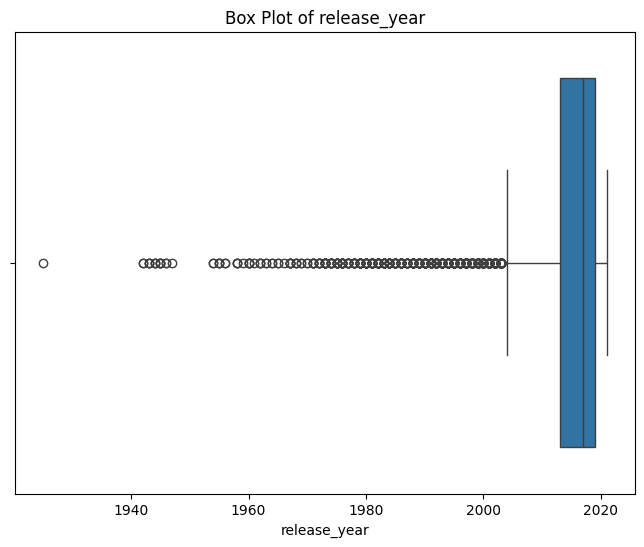

In [181]:

# Identify numeric and categorical columns
numeric_cols = dirty_data.select_dtypes(include=np.number).columns
categorical_cols = dirty_data.select_dtypes(exclude=np.number).columns

# Create box plots for numeric columns
for col in numeric_cols:
  plt.figure(figsize=(8, 6))
  sns.boxplot(x=dirty_data[col])
  plt.title(f'Box Plot of {col}')
  plt.show()


In [185]:

# Assuming 'dirty_data' DataFrame from the provided code is available.

# Filter the DataFrame to include only rows where 'release_year' is less than 2000
filtered_df = dirty_data[dirty_data['release_year'] < 2000]

# Display the 'release_year' column of the filtered DataFrame
filtered_df

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
7,s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...",2021-09-24,1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s..."
22,s23,Movie,Avvai Shanmughi,K.S. Ravikumar,"Kamal Hassan, Meena, Gemini Ganesan, Heera Raj...",NaN,2021-09-21,1996,TV-PG,161 min,"Comedies, International Movies",Newly divorced and denied visitation rights wi...
24,s25,Movie,Jeans,S. Shankar,"Prashanth, Aishwarya Rai Bachchan, Sri Lakshmi...",India,2021-09-21,1998,TV-14,166 min,"Comedies, International Movies, Romantic Movies",When the father of the man she loves insists t...
26,s27,Movie,Minsara Kanavu,Rajiv Menon,"Arvind Swamy, Kajol, Prabhu Deva, Nassar, S.P....",NaN,2021-09-21,1997,TV-PG,147 min,"Comedies, International Movies, Music & Musicals",A tangled love triangle ensues when a man fall...
41,s42,Movie,Jaws,Steven Spielberg,"Roy Scheider, Robert Shaw, Richard Dreyfuss, L...",United States,2021-09-16,1975,PG,124 min,"Action & Adventure, Classic Movies, Dramas",When an insatiable great white shark terrorize...
...,...,...,...,...,...,...,...,...,...,...,...,...
8745,s8746,Movie,Willy Wonka & the Chocolate Factory,Mel Stuart,"Gene Wilder, Jack Albertson, Peter Ostrum, Roy...","United States, East Germany, West Germany",2020-01-01,1971,G,100 min,"Children & Family Movies, Classic Movies, Come...",Zany Willy Wonka causes a stir when he announc...
8748,s8749,Movie,Winter of Our Dreams,John Duigan,"Judy Davis, Bryan Brown, Cathy Downes, Baz Luh...",Australia,2016-11-01,1981,NR,86 min,"Classic Movies, Dramas","After the death of a long-ago lover, married p..."
8763,s8764,Movie,WWII: Report from the Aleutians,John Huston,NaN,United States,2017-03-31,1943,TV-PG,45 min,Documentaries,Filmmaker John Huston narrates this Oscar-nomi...
8764,s8765,Movie,Wyatt Earp,Lawrence Kasdan,"Kevin Costner, Dennis Quaid, Gene Hackman, Dav...",United States,2020-01-01,1994,PG-13,191 min,Action & Adventure,Legendary lawman Wyatt Earp is continually at ...


In [186]:
def detect_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)][column]
    return outliers

In [189]:
movies_df = dirty_data[dirty_data['type'] == 'Movie']
tv_df = dirty_data[dirty_data['type'] == 'TV Show']

# Extract numerical duration
movies_df['duration_num'] = movies_df['duration'].str.extract('(\d+)').astype(float)
tv_df['duration_num'] = tv_df['duration'].str.extract('(\d+)').astype(float)

movie_outliers = detect_outliers(movies_df, 'duration_num')
tv_outliers = detect_outliers(tv_df, 'duration_num')


<ipython-input-189-fae1c1f58808>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movies_df['duration_num'] = movies_df['duration'].str.extract('(\d+)').astype(float)
<ipython-input-189-fae1c1f58808>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tv_df['duration_num'] = tv_df['duration'].str.extract('(\d+)').astype(float)


,duration_num
8,9.0
15,4.0
21,5.0
55,6.0
65,6.0
...,...
8541,4.0
8557,7.0
8653,4.0
8710,8.0


In [190]:
year_outliers = detect_outliers(dirty_data, 'release_year')

# Text Standardization Issues
# Check for inconsistent country names
country_variations = dirty_data['country'].dropna().str.strip().value_counts()
similar_countries = []
for country in country_variations.index:
    if ',' in country:  # Check for multiple countries
        similar_countries.extend(country.split(','))

# Check for inconsistent ratings
rating_variations = dirty_data['rating'].dropna().str.strip().value_counts()

# Check for inconsistent listed_in categories
genre_variations = dirty_data['listed_in'].dropna().str.strip().value_counts()

print("Movie Duration Outliers:")
print(movie_outliers.sort_values())
print("\nTV Show Season Outliers:")
print(tv_outliers.sort_values())
print("\nRelease Year Outliers:")
print(year_outliers.sort_values())
print("\nUnique Country Formats:", len(country_variations))
print("\nUnique Rating Formats:", rating_variations)


Movie Duration Outliers:
3777      3.0
2713      5.0
1484      8.0
1557      9.0
3535     10.0
        ...  
2484    233.0
2487    237.0
2491    253.0
717     273.0
4253    312.0
Name: duration_num, Length: 450, dtype: float64

TV Show Season Outliers:
1569     4.0
1948     4.0
4857     4.0
1929     4.0
5126     4.0
        ... 
4220    13.0
1354    13.0
4798    15.0
2423    15.0
548     17.0
Name: duration_num, Length: 259, dtype: float64

Release Year Outliers:
4250    1925
8205    1942
7790    1942
8660    1943
8763    1943
        ... 
6837    2003
1825    2003
6806    2003
7189    2003
2732    2003
Name: release_year, Length: 719, dtype: int64

Unique Country Formats: 748

Unique Rating Formats: rating
TV-MA       3207
TV-14       2160
TV-PG        863
R            799
PG-13        490
TV-Y7        334
TV-Y         307
PG           287
TV-G         220
NR            80
G             41
TV-Y7-FV       6
NC-17          3
UR             3
Name: count, dtype: int64


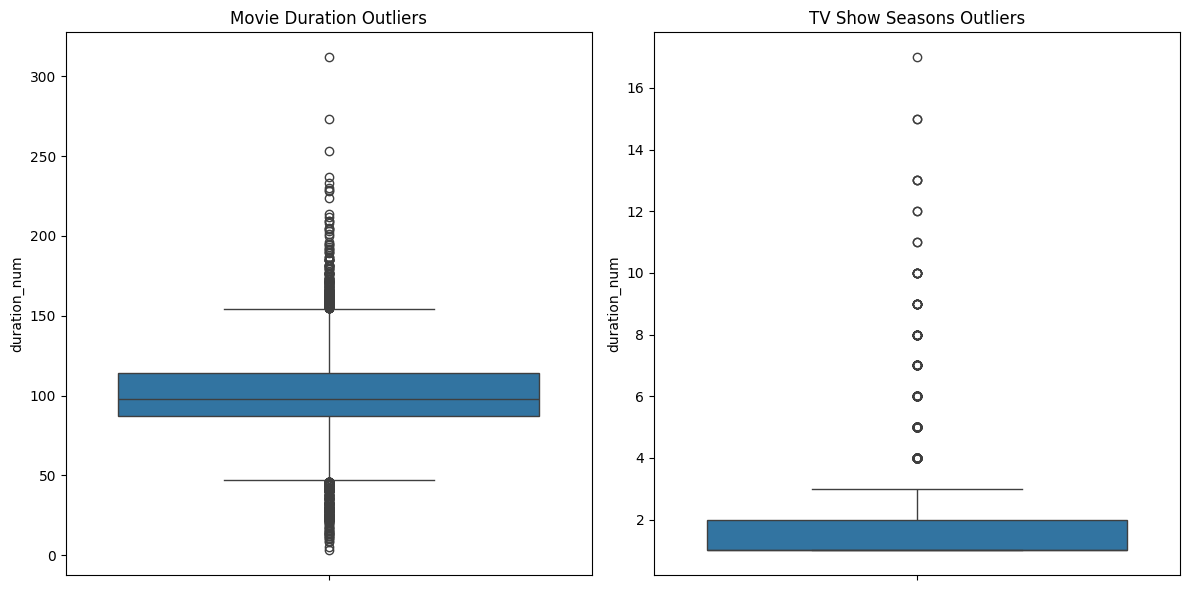

In [191]:
# Visualize outliers
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.boxplot(data=movies_df, y='duration_num')
plt.title('Movie Duration Outliers')

plt.subplot(1, 2, 2)
sns.boxplot(data=tv_df, y='duration_num')
plt.title('TV Show Seasons Outliers')
plt.tight_layout()
plt.show()

In [193]:
def standardize_countries(country_str):
    if pd.isna(country_str):
        return "Unknown"

    # Basic country mappings
    mappings = {
        'UAE': 'United Arab Emirates',
        'UK': 'United Kingdom',
        'USA': 'United States',
        'Czech Republic': 'Czechia',
        'East Germany': 'Germany',
        'West Germany': 'Germany'
    }

# Split, clean, and standardize each country
    countries = [c.strip() for c in country_str.split(',')]
    standardized = [mappings.get(c, c) for c in countries]

    # Sort alphabetically for consistency
    return ', '.join(sorted(set(standardized)))

# Example multi-country entries
sample_entries = [
    'Czech Republic, United Kingdom, France',
    'Australia, United Kingdom, Canada',
    'United States, East Germany, West Germany',
    'United Arab Emirates, Jordan'
]

# Process and display results
for entry in sample_entries:
    print(f"Original: {entry}")
    print(f"Standardized: {standardize_countries(entry)}\n")

# Function to get unique country combinations
def get_unique_combinations(df, country_col):
    return df[country_col].value_counts()

# Count frequency of co-productions
def analyze_coproductions(df, country_col):
    df['num_countries'] = df[country_col].str.count(',') + 1
    return df['num_countries'].value_counts().sort_index()

# Apply standardization
dirty_data['country'] = dirty_data['country'].apply(standardize_countries)

Original: Czech Republic, United Kingdom, France
Standardized: Czechia, France, United Kingdom

Original: Australia, United Kingdom, Canada
Standardized: Australia, Canada, United Kingdom

Original: United States, East Germany, West Germany
Standardized: Germany, United States

Original: United Arab Emirates, Jordan
Standardized: Jordan, United Arab Emirates



In [194]:
dirty_data.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",Unknown,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,Unknown,2021-09-24,2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [197]:
# Convert 'release_year' to numeric, handling errors
dirty_data['release_year'] = pd.to_numeric(dirty_data['release_year'], errors='coerce')

# Select only numeric columns for percentile calculation
numeric_data = dirty_data.select_dtypes(include=np.number)

# Now calculate percentiles on the numeric data
Q1 = np.percentile(numeric_data, 25)
Q3 = np.percentile(numeric_data, 75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Detect outliers in the numeric data
outliers = numeric_data[(numeric_data < lower_bound) | (numeric_data > upper_bound)]


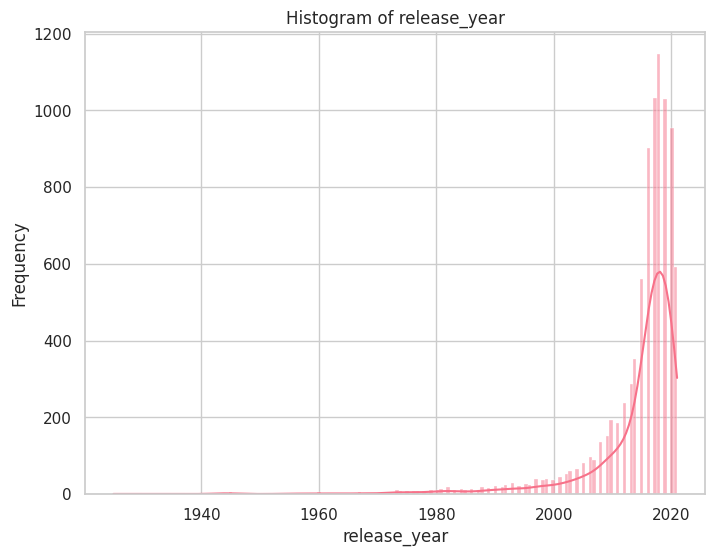

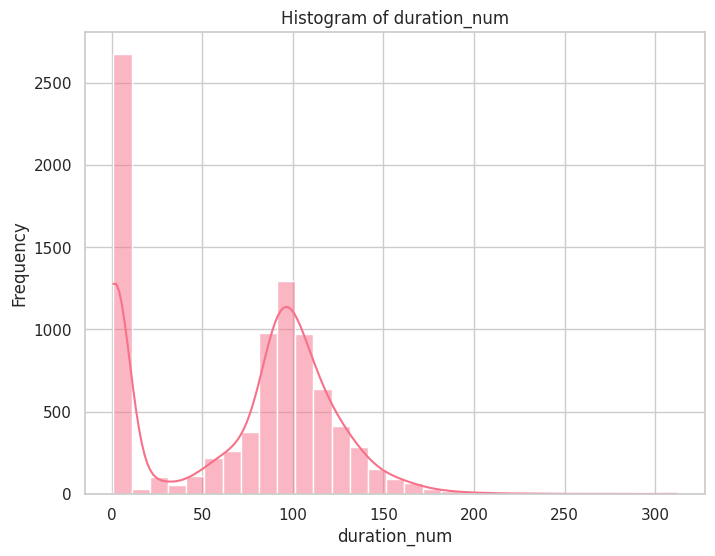

In [217]:

# Assuming 'dirty_data' DataFrame from the provided code is available.

# Identify numeric and categorical columns
numeric_cols = dirty_data.select_dtypes(include=np.number).columns
categorical_cols = dirty_data.select_dtypes(exclude=np.number).columns

# Create histograms for numeric columns
for col in numeric_cols:
    plt.figure(figsize=(8, 6))
    sns.histplot(dirty_data[col], kde=True)  # Include KDE for smoother distribution visualization
    plt.title(f'Histogram of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()


In [201]:
# Non-graphical analysis
print("\nNumerical Variables Summary:")
print(dirty_data[['release_year']].describe())

print("\nCategorical Variables Summary:")
print("\nContent Type Distribution:")
print(dirty_data['type'].value_counts(normalize=True).round(3) * 100)

print("\nTop 5 Ratings:")
print(dirty_data['rating'].value_counts().head().round(3))

# Duration analysis
dirty_data['duration_num'] = dirty_data['duration'].str.extract('(\d+)').astype(float)
print("\nDuration Summary by Content Type:")
print(dirty_data.groupby('type')['duration_num'].describe().round(2))


Numerical Variables Summary:
       release_year
count   8807.000000
mean    2014.180198
std        8.819312
min     1925.000000
25%     2013.000000
50%     2017.000000
75%     2019.000000
max     2021.000000

Categorical Variables Summary:

Content Type Distribution:
type
Movie      69.6
TV Show    30.4
Name: proportion, dtype: float64

Top 5 Ratings:
rating
TV-MA    3207
TV-14    2160
TV-PG     863
R         799
PG-13     490
Name: count, dtype: int64

Duration Summary by Content Type:
          count   mean    std  min   25%   50%    75%    max
type                                                        
Movie    6131.0  99.56  28.29  3.0  87.0  98.0  114.0  312.0
TV Show  2676.0   1.76   1.58  1.0   1.0   1.0    2.0   17.0


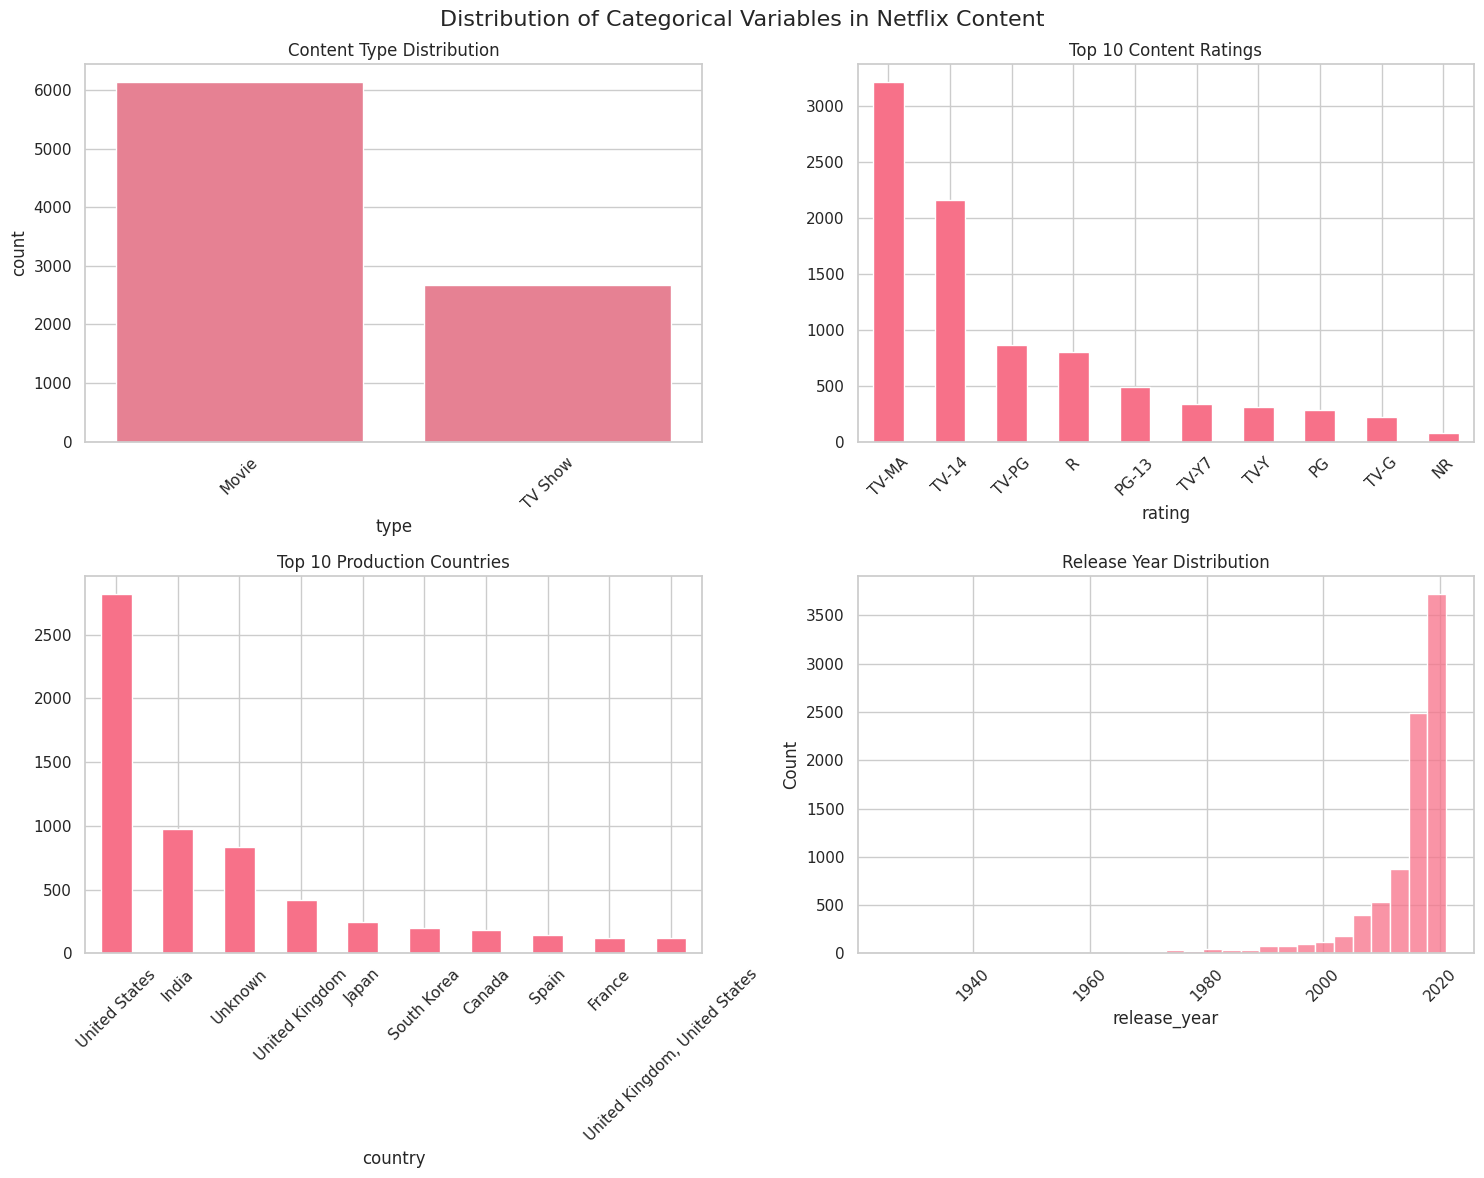

In [208]:
import matplotlib.pyplot as plt
import seaborn as sns

# Use Seaborn's set_theme function to apply styles
sns.set_theme(style="whitegrid")  # This will set the 'whitegrid' style from Seaborn

sns.set_palette("husl")

# Create subplots for categorical variables
fig, axes = plt.subplots(2, 2, figsize=(15, 12))
fig.suptitle('Distribution of Categorical Variables in Netflix Content', fontsize=16)


# Type distribution
sns.countplot(data=dirty_data, x='type', ax=axes[0,0])
axes[0,0].set_title('Content Type Distribution')
axes[0,0].tick_params(axis='x', rotation=45)

# Top 10 ratings
dirty_data['rating'].value_counts().head(10).plot(kind='bar', ax=axes[0,1])
axes[0,1].set_title('Top 10 Content Ratings')
axes[0,1].tick_params(axis='x', rotation=45)

# Top 10 countries
dirty_data['country'].value_counts().head(10).plot(kind='bar', ax=axes[1,0])
axes[1,0].set_title('Top 10 Production Countries')
axes[1,0].tick_params(axis='x', rotation=45)

# Release year distribution
sns.histplot(data=dirty_data, x='release_year', bins=30, ax=axes[1,1])
axes[1,1].set_title('Release Year Distribution')
axes[1,1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

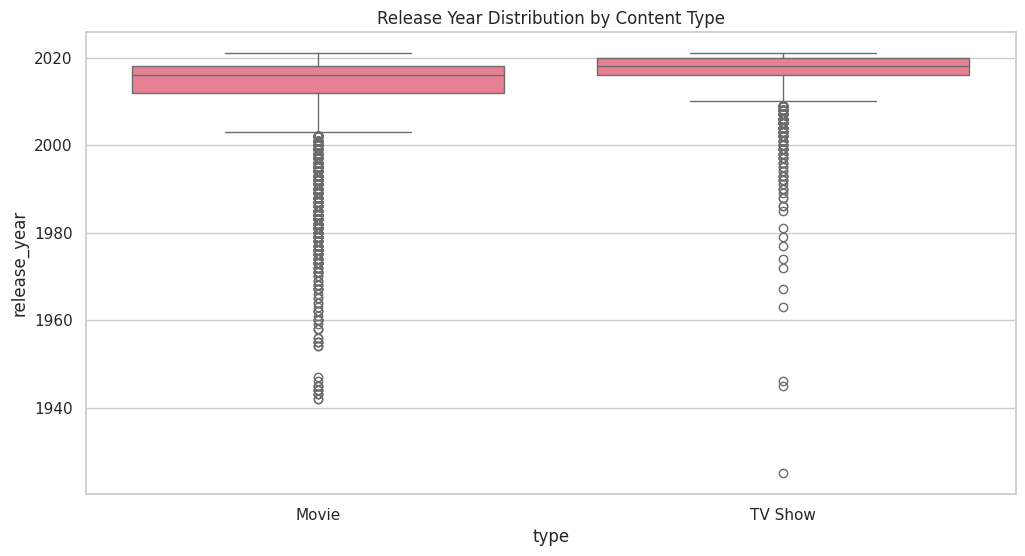

In [209]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=dirty_data, x='type', y='release_year')
plt.title('Release Year Distribution by Content Type')
plt.show()

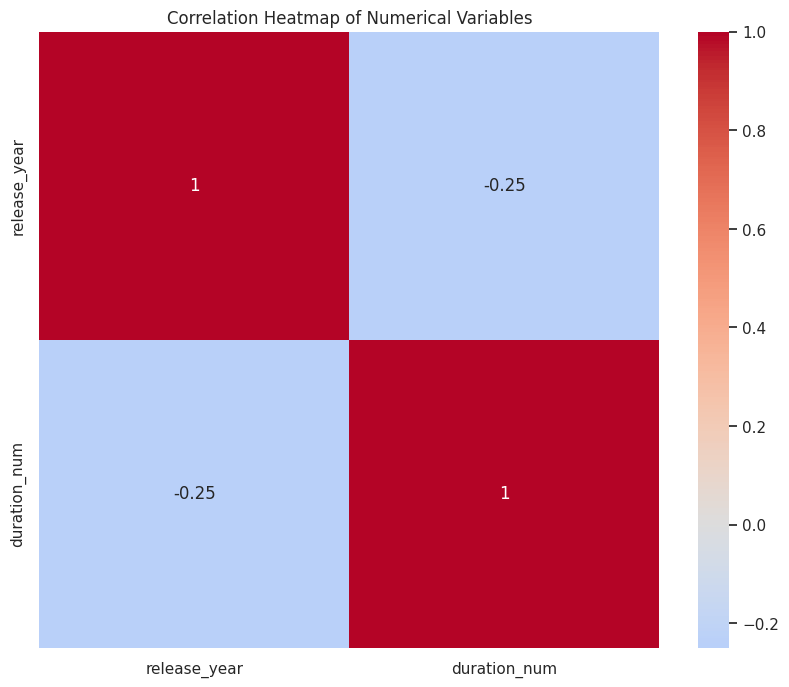

<Figure size 1200x600 with 0 Axes>

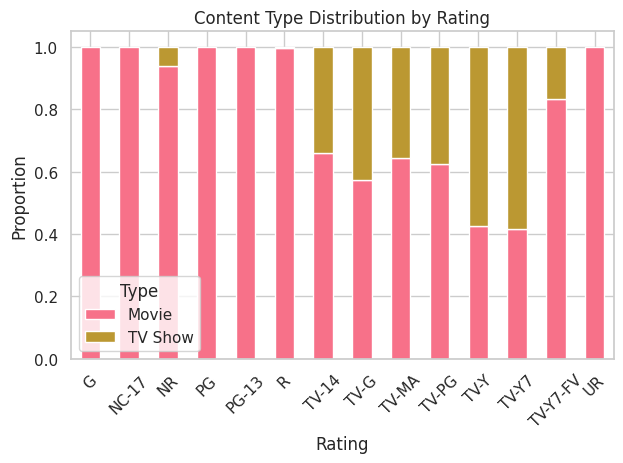

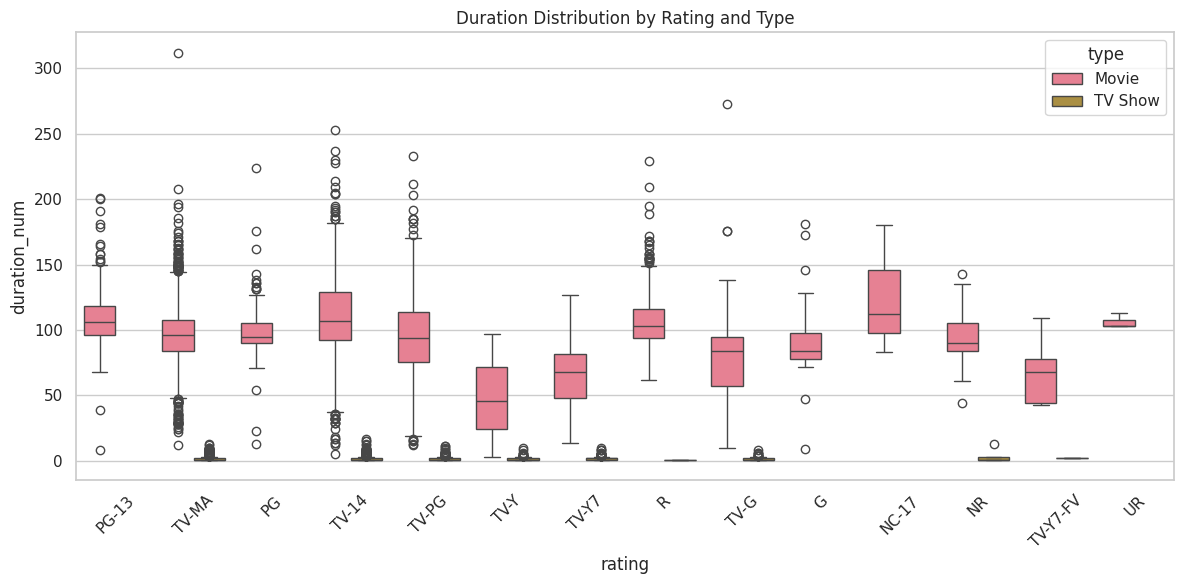


Average Duration by Country and Rating:
rating              G  NC-17      NR      PG   PG-13       R   TV-14   TV-G  \
country                                                                       
India             NaN    NaN  110.00  133.00  143.75  168.00  125.24  79.33   
Japan             NaN    NaN     NaN   91.50  106.33     NaN   22.62   1.00   
United Kingdom    NaN    NaN   59.80   99.50  112.25  102.06   34.54  29.09   
United States   89.24   83.0   80.71   98.26  105.78  106.12   44.30  37.87   
Unknown           NaN    NaN     NaN   85.33   92.88  102.09   57.34  46.33   

rating           TV-MA   TV-PG   TV-Y  TV-Y7  TV-Y7-FV     UR  
country                                                        
India           103.46  117.66   1.00  60.79     109.0    NaN  
Japan            30.33   52.03  11.50  18.47       NaN    NaN  
United Kingdom   43.38   26.71  13.05   7.80       NaN    NaN  
United States    56.16   45.31  23.64  23.21      43.0  113.0  
Unknown          45.4

In [214]:
dirty_data['duration_num'] = dirty_data['duration'].str.extract('(\d+)').astype(float)

# Create correlation matrix for numerical variables
numerical_df = dirty_data[['release_year', 'duration_num']]
correlation_matrix = numerical_df.corr()

# 1. Heatmap of correlations
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Heatmap of Numerical Variables')
plt.show()

# 2. Stacked bar chart of content type by rating
plt.figure(figsize=(12, 6))
df_type_rating = pd.crosstab(dirty_data['rating'], dirty_data['type'], normalize='index')
df_type_rating.plot(kind='bar', stacked=True)
plt.title('Content Type Distribution by Rating')
plt.xlabel('Rating')
plt.ylabel('Proportion')
plt.legend(title='Type')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 3. Average duration by rating and type
plt.figure(figsize=(12, 6))
sns.boxplot(x='rating', y='duration_num', hue='type', data=dirty_data)
plt.title('Duration Distribution by Rating and Type')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Non-graphical analysis
# 1. Average duration by rating and country (top 5 countries)
top_countries = dirty_data['country'].value_counts().head().index
duration_by_country_rating = dirty_data[dirty_data['country'].isin(top_countries)].pivot_table(
    values='duration_num',
    index='country',
    columns='rating',
    aggfunc='mean'
).round(2)

print("\nAverage Duration by Country and Rating:")
print(duration_by_country_rating)

# 2. Content type distribution by country and year period
dirty_data['year_period'] = pd.cut(dirty_data['release_year'],
                          bins=[1900, 2000, 2010, 2020, 2025],
                          labels=['Pre-2000', '2000-2010', '2010-2020', '2020+'])

content_distribution = pd.crosstab([dirty_data['country'], dirty_data['year_period']],
                                 dirty_data['type'],
                                 normalize='index')

print("\nContent Type Distribution by Country and Time Period:")
print(content_distribution.head(10))


## **Key Trends and Insights:**

### **Univariate Analysis**

**Content Type:** The dataset contains more movies (69.1%) than TV shows (30.9%).

**Release Year:** There is a clear increasing trend in content added to Netflix over the years, with a significant increase after the year 2000.

**Rating:** The most common rating is "TV-MA" for mature audiences, followed by "TV-14" and "TV-PG."

**Duration:** Movies typically have a duration between 60 and 120 minutes, while TV shows have a duration of 1 to 3 seasons.

**Country:** The United States is the largest producer of content on Netflix, followed by India and the United Kingdom.

### **Bivariate and Multivariate Analysis**

**Correlation:** There is a weak positive correlation between release year and duration for movies. This might indicate that movies have become slightly longer over time.

**Content Type and Rating:** TV shows tend to have a higher proportion of mature ratings ("TV-MA," "TV-14") compared to movies. Movies have a wider range of ratings.

**Duration, Rating, and Type:** Movies with longer durations are often associated with more mature ratings. TV shows with more seasons might also have more mature ratings. This suggests that content for adult audiences might be more complex and require longer viewing times.

**Production Trends:** The United States has consistently produced a large amount of content for Netflix across different time periods. However, there's a noticeable increase in content from other countries, especially India, in recent years.

### **Surprising Findings and Anomalies**

**Outliers:** Outliers were found in movie durations (very short or very long movies), as well as in release years (very old movies). These outliers could be due to errors in data entry or might represent specific types of content.

**Inconsistent Country Formats:** Some variations in country names were observed, which were addressed by standardizing the country column.

### **Important Patterns and Relationships**

**Rating and Content Type:** The relationship between content type and rating might be important for understanding the target audience and making content recommendations.

**Content Production Trends:** The trend of increased content from other countries can inform strategies for content acquisition and diversification.

### **Business and Research Implications**

**Content Strategy:** Netflix can use these insights to guide decisions on the types of content to produce or acquire, considering the target audience and preferred durations.

**Recommendation System:** The relationships between rating, content type, and duration can be used to improve recommendations, ensuring that users see content relevant to their preferences.

**Global Expansion:** Understanding content production trends in different countries can help Netflix target specific regions with content that resonates with local audiences.
Further Investigation

**Outlier Analysis:** Investigate the outliers in movie durations and release years further to understand their context and potentially address data quality issues.

**Regional Preferences:** Explore content preferences and trends within specific regions and demographics for more targeted content delivery.

## **Conclusions**

This analysis provides valuable insights into the content landscape of Netflix. The findings can be used to inform content strategy, recommendation systems, and talent acquisition. Further investigation is needed to explore regional preferences, director influence, and other potential factors.